<a href="https://colab.research.google.com/github/MBarak9/Google-capstone-projects/blob/main/Cyclistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Case study**

In this case study, the scenario was :

You are a junior data analyst working on the marketing analyst team at
Cyclistic is a bike-share company in Chicago.

The director of marketing believes the company's future success depends
on maximizing the number of annual memberships.

Therefore, your team wants to understand how Casual riders and annual
members use Cyclistic bikes differently.

From these insights, your team will design a new marketing strategy to
convert casual riders into annual members.

But first, Cyclistic executives must approve your recommendations, so
they must be backed up with compelling data insights and professional
data visualizations.

# **Business goal**

The business goal is to ***convert casual riders into annual members***.
To achieve this goal, it is crucial to understand :


*   How do annual members and casual riders use Cyclistic bikes differently ?

* Where are the best places to act ?

We will try to answer those questions througout the exploration and analysis of the data




# **Gather the data**

Now that we know what problem to solve, we need to gather necessary data to answer the questions. We will use Cyclistic's historical trip data for the past year (2023).

In [ ]:
# prompt: connect with google drive a folder called "data test"

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import os
os.chdir("/content/drive/MyDrive/Cyclistic case study")


# Import necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

Mounted at /content/drive/


In [ ]:
# Import all past months csv data and concat them to form the entire data of 2023
df = pd.read_csv(f"202301-divvy-tripdata.csv")
for i in range(2,12):
  if i<9:
    df = pd.concat([df,pd.read_csv(f"20230{i+1}-divvy-tripdata.csv")],ignore_index=True)
  else:
    df = pd.concat([df,pd.read_csv(f"2023{i+1}-divvy-tripdata.csv")],ignore_index=True)

# **Data processing and preparation**

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529432 entries, 0 to 5529431
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 548.4+ MB


## Drop unnecessary columns and convert data types
We will not work with the ids. Instead we will keep the names.

In [ ]:
#Drop the id columns
df.drop(columns=["start_station_id","end_station_id"],inplace=True)

#Change the data types of date columns
df["started_at"] = pd.to_datetime(df['started_at'])
df["ended_at"] = pd.to_datetime(df['ended_at'])
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Hampden Ct & Diversey Ave,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,Valli Produce - Evanston Plaza,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member
...,...,...,...,...,...,...,...,...,...,...,...
5529427,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,Racine Ave & Congress Pkwy,41.874702,-87.649804,41.874640,-87.657030,casual
5529428,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,Racine Ave & Congress Pkwy,41.874754,-87.649807,41.874640,-87.657030,casual
5529429,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,Racine Ave & Congress Pkwy,41.874754,-87.649807,41.874640,-87.657030,member
5529430,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,Morgan St & Lake St*,41.881396,-87.674984,41.885492,-87.652289,casual


## Check for duplicates entries

In [ ]:
print("Shape of the data : ",df.shape)
print("Shape without duplicates : ",df.drop_duplicates().shape)

Shape of the data :  (5529432, 11)
Shape without duplicates :  (5529432, 11)


So, there are no duplicates values since the original shape of teh dataframe is the same when dropping duplicates

## Check for missing data

In [ ]:
missing_values_count = 0
size = df.size
rows_missing_values = len(df[df.isnull().any(axis="columns")])
for c in df.columns:
  missing_values_count += list(df[c].isnull()).count(True)
  print(c,":",list(df[c].isnull()).count(True))

print("There are ",missing_values_count,"missing values which represent",round(missing_values_count*100/size,0),"% of the data")

print(rows_missing_values,"rows out of ",len(df),",",round(rows_missing_values*100/len(df),0),"% present missing values")

ride_id : 0
rideable_type : 0
started_at : 0
ended_at : 0
start_station_name : 850243
end_station_name : 902464
start_lat : 0
start_lng : 0
end_lat : 6874
end_lng : 6874
member_casual : 0
There are  1766455 missing values which represent 3.0 % of the data
1347285 rows out of  5529432 , 24.0 % present missing values


**24% of de the entries** present missing values in column ***start_station_name*** and ***end_station_name*** . So we can't drop them, we have to find a convenient way to fill them.

Fortunately, those missing station names have their latitute and longitude. We can replace them with the closest stations.

Only **0.12% (6874 out of 5M)** of rows miss end_lat and end_lng, we can drop them.

In [ ]:
df = df.dropna(axis=0,subset=["end_lat","end_lng"])

In [ ]:
#Let's record all the stations in the data and average their coordinates
start_stations = df.groupby('start_station_name').agg({
    'start_lat': 'mean',
    'start_lng': 'mean'
}).reset_index()

end_stations = df.groupby('end_station_name').agg({
    'end_lat': 'mean',
    'end_lng': 'mean'
}).reset_index().rename(columns={
    "end_station_name":"start_station_name",
    "end_lat":"start_lat",
    "end_lng":"start_lng"})

stations = pd.concat([start_stations, end_stations],).reset_index().groupby('start_station_name').agg({
    'start_lat': 'mean',
    'start_lng': 'mean'
}).reset_index().rename(columns={
    "start_station_name":"station_name",
    "start_lat":"lat",
    "start_lng":"lng"})

stations

,station_name,lat,lng
0,2112 W Peterson Ave,41.991176,-87.683597
1,410,41.900000,-87.690000
2,63rd St Beach,41.780916,-87.576320
3,900 W Harrison St,41.874758,-87.649813
4,Aberdeen St & Jackson Blvd,41.877739,-87.654797
...,...,...,...
1610,Woodlawn Ave & 58th St,41.789384,-87.596482
1611,Woodlawn Ave & 75th St,41.759166,-87.595754
1612,Woodlawn Ave & Lake Park Ave,41.814091,-87.597007
1613,Yates Blvd & 75th St,41.758753,-87.566432


In [ ]:
from scipy.spatial import KDTree

# Create a KD-tree from the station coordinates
station_coords = stations[['lat', 'lng']].values
kdtree = KDTree(station_coords)

# Function that find the closest station using KD-tree
def find_closest_start_station(row):
    distance, index = kdtree.query([row["start_lat"], row["start_lng"]])
    closest_station_name = stations.iloc[index]["station_name"]
    return closest_station_name

def find_closest_end_station(row):
    distance, index = kdtree.query([row["end_lat"], row["end_lng"]])
    closest_station_name = stations.iloc[index]["station_name"]
    return closest_station_name

Let's test our filling method if it work better over 1000 random trips.

In [ ]:
warnings.filterwarnings("ignore")
df_test = df.dropna().sample(n=1000,random_state=1) #Random_state(can takeany integer) ensure the sample will not change every time you run the code to ensure reproductibility and consistency of the results
df_test["closest_station"] = df_test.apply(find_closest_start_station,axis=1)
df_test.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,closest_station
1276659,67B0F2135DECA66F,classic_bike,2023-05-21 12:38:03,2023-05-21 12:50:22,Broadway & Ridge Ave,Winthrop Ave & Lawrence Ave,41.984045,-87.660274,41.968812,-87.657659,casual,Broadway & Ridge Ave
3966681,296CFD67E488E03D,electric_bike,2023-09-10 12:38:36,2023-09-10 12:43:54,St. Clair St & Erie St,Dearborn Pkwy & Delaware Pl,41.894284,-87.622456,41.898969,-87.629912,member,St. Clair St & Erie St
1555626,34EF4EA68EC35DA8,classic_bike,2023-06-14 10:25:02,2023-06-14 10:29:10,Clark St & Elm St,State St & Chicago Ave,41.902973,-87.631280,41.896617,-87.628579,member,Clark St & Elm St
2992441,E1621FC0B345C100,electric_bike,2023-08-23 15:30:10,2023-08-23 15:46:43,Franklin St & Monroe St,Halsted St & Wrightwood Ave,41.879213,-87.634584,41.929143,-87.649077,member,Franklin St & Adams St (Temp)
3581958,F8EE63F88916786A,classic_bike,2023-08-20 19:28:14,2023-08-20 19:55:05,Theater on the Lake,Clark St & Armitage Ave,41.926277,-87.630834,41.918306,-87.636282,member,Theater on the Lake


In [ ]:
print("It successfully predict ",round(len(df_test[df_test["closest_station"] == df_test["start_station_name"]])*100/len(df_test),0),"% of the 1000 test sample")

It successfully predict  98.0 % of the 1000 test sample


Now let's apply the method for filling the missing start_station and end_station names

In [ ]:
df.loc[df["start_station_name"].isnull(),"start_station_name"] = df[df["start_station_name"].isnull()].apply(find_closest_start_station,axis=1)

df.loc[df["end_station_name"].isnull(),"end_station_name"] = df[df["end_station_name"].isnull()].apply(find_closest_end_station,axis=1)


In [ ]:
print("Number of missing values by column")
for c in df.columns:
  print(c,":",list(df[c].isnull()).count(True))

Number of missing values by column
ride_id : 0
rideable_type : 0
started_at : 0
ended_at : 0
start_station_name : 0
end_station_name : 0
start_lat : 0
start_lng : 0
end_lat : 0
end_lng : 0
member_casual : 0


## Create new columns for future analysis

In [ ]:
#Convert to datetime columns
df["duration"] = (df["ended_at"]-df['started_at'])/pd.Timedelta(minutes=1)  # Convert the duration in minutes
df["duration"] = df["duration"].round(2) # Round to 2 digits after the decimal point

df["day_of_week"] = df["started_at"].dt.strftime("%A")
df["month"] = df["started_at"].dt.strftime("%B")
df["hour"] = df["started_at"].dt.strftime("%H")

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration,day_of_week,month,hour
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Hampden Ct & Diversey Ave,41.924074,-87.646278,41.930000,-87.640000,member,10.85,Saturday,January,20
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member,8.48,Tuesday,January,15
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,Valli Produce - Evanston Plaza,42.008571,-87.690483,42.039742,-87.699413,casual,13.23,Monday,January,07
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member,8.77,Sunday,January,10
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member,15.32,Thursday,January,13


## Check for outliers and inconsistencies

In [ ]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration
count,5522558,5522558,5.522558e+06,5.522558e+06,5.522558e+06,5.522558e+06,5.522558e+06
mean,2023-07-21 14:59:42.067066112,2023-07-21 15:14:57.744314624,4.190307e+01,-8.764702e+01,4.190339e+01,-8.764718e+01,1.526129e+01
min,2023-01-01 00:01:58,2023-01-01 00:02:41,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01,-1.665652e+04
25%,2023-05-27 18:41:10.500000,2023-05-27 19:00:26.249999872,4.188102e+01,-8.766000e+01,4.188103e+01,-8.766027e+01,5.470000e+00
50%,2023-07-24 05:25:49.500000,2023-07-24 05:45:49.500000,4.189951e+01,-8.764403e+01,4.190000e+01,-8.764410e+01,9.600000e+00
75%,2023-09-19 15:47:29.500000,2023-09-19 15:58:10.500000,4.193000e+01,-8.762991e+01,4.193059e+01,-8.762991e+01,1.702000e+01
max,2023-12-31 23:59:38,2024-01-01 14:20:23,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00,1.213630e+04
std,NaN,NaN,4.491261e-02,2.728945e-02,5.463225e-02,7.017962e-02,3.671868e+01


There are some trips with negative duration and some with very low. These trips need to be investigated. Let's suppose that trips that last under 2 minutes are abnormal and drop them.

In [ ]:
df = df[df["duration"]>=2]
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration
count,5270261,5270261,5.270261e+06,5.270261e+06,5.270261e+06,5.270261e+06,5.270261e+06
mean,2023-07-22 01:07:32.721699840,2023-07-22 01:23:30.660287232,4.190321e+01,-8.764701e+01,4.190355e+01,-8.764719e+01,1.596564e+01
min,2023-01-01 00:02:06,2023-01-01 00:07:23,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01,2.000000e+00
25%,2023-05-28 13:43:58,2023-05-28 14:08:38,4.188103e+01,-8.766000e+01,4.188103e+01,-8.766027e+01,5.970000e+00
50%,2023-07-24 17:00:18,2023-07-24 17:15:17,4.189969e+01,-8.764404e+01,4.190000e+01,-8.764410e+01,1.007000e+01
75%,2023-09-19 20:03:31,2023-09-19 20:16:55,4.193000e+01,-8.762991e+01,4.193125e+01,-8.762991e+01,1.757000e+01
max,2023-12-31 23:58:55,2024-01-01 14:20:23,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00,1.213630e+04
std,NaN,NaN,4.484366e-02,2.721871e-02,5.188193e-02,6.053032e-02,3.397496e+01


# **Analyze step**

## General overview

In [ ]:
print("Scope of the study : ",df["started_at"].min()," to ",df["started_at"].max())
print("Number of trips : ",len(df))
print("Number of stations : ", df["start_station_name"].nunique())
print("Range of duration : ",df["duration"].min(),"minutes"," to ",(df["duration"].max()/60).round(1)," hours")
print("Average duration : ",df["duration"].mean().round(1),"minutes")
print("Mode of day of week : ",df['day_of_week'].mode()[0])
print("Mode of month : ",df['month'].mode()[0])
print("Pick hour : ",df['hour'].mode()[0])

Scope of the study :  2023-01-01 00:02:06  to  2023-12-31 23:58:55
Number of trips :  5270261
Number of stations :  1598
Range of duration :  2.0 minutes  to  202.3  hours
Average duration :  16.0 minutes
Mode of day of week :  Saturday
Mode of month :  August
Pick hour :  17


Now let's dig in the data and search for insights to answer the three questions.

## 1st question : How do annual members and casual riders use Cyclistic bikes differently ?

In [ ]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,duration,day_of_week,month,hour
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Hampden Ct & Diversey Ave,41.924074,-87.646278,41.930000,-87.640000,member,10.85,Saturday,January,20
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.799568,-87.594747,41.809835,-87.599383,member,8.48,Tuesday,January,15
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,Valli Produce - Evanston Plaza,42.008571,-87.690483,42.039742,-87.699413,casual,13.23,Monday,January,07


### What type of bike do riders prefer ?

In [ ]:
print("Member ",df["member_casual"].value_counts()[0],", ",(100*df["member_casual"].value_counts()[0]/len(df)).round(0),"%")
print("Casual ",df["member_casual"].value_counts()[1],", ",(100*df["member_casual"].value_counts()[1]/len(df)).round(0),"%")

Member  3341225 ,  63.0 %
Casual  1929036 ,  37.0 %


In [ ]:
group = df.groupby("member_casual")

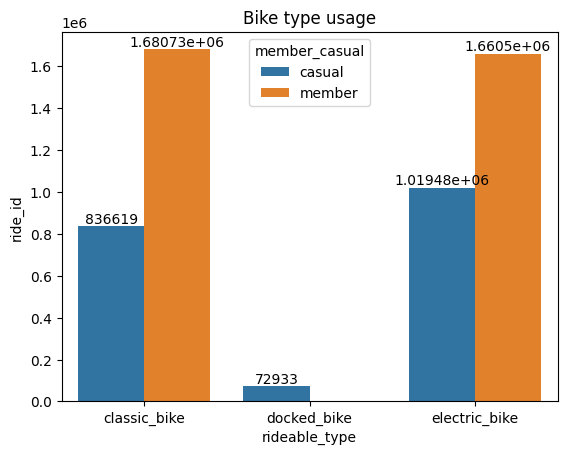

In [ ]:
# Bar plot
group1 = df.groupby(["member_casual","rideable_type"])["ride_id"].count().reset_index()
ax = sns.barplot(data=group1,x="rideable_type",y="ride_id",hue="member_casual",legend="brief")
ax.bar_label(ax.containers[0],fontsize=10)
ax.bar_label(ax.containers[1],fontsize=10)
plt.title("Bike type usage")
plt.show()

### What is the average ride duration of each type of riders ?

In [ ]:
group.agg({
    "duration" : ["count","mean","min","median",lambda x:x.quantile(0.75),"max"]
}).rename(columns={
    "count": "Count",
    "mean": "Mean",
    "min": "Min",
    "<lambda_0>": "Q3",
    "max": "Max"
})

duration                                        
                 Count       Mean  Min median     Q3       Max
member_casual                                                 
casual         1929036  21.600303  2.0  12.43  22.85  12136.30
member         3341225  12.712506  2.0   9.02  15.15   1499.93

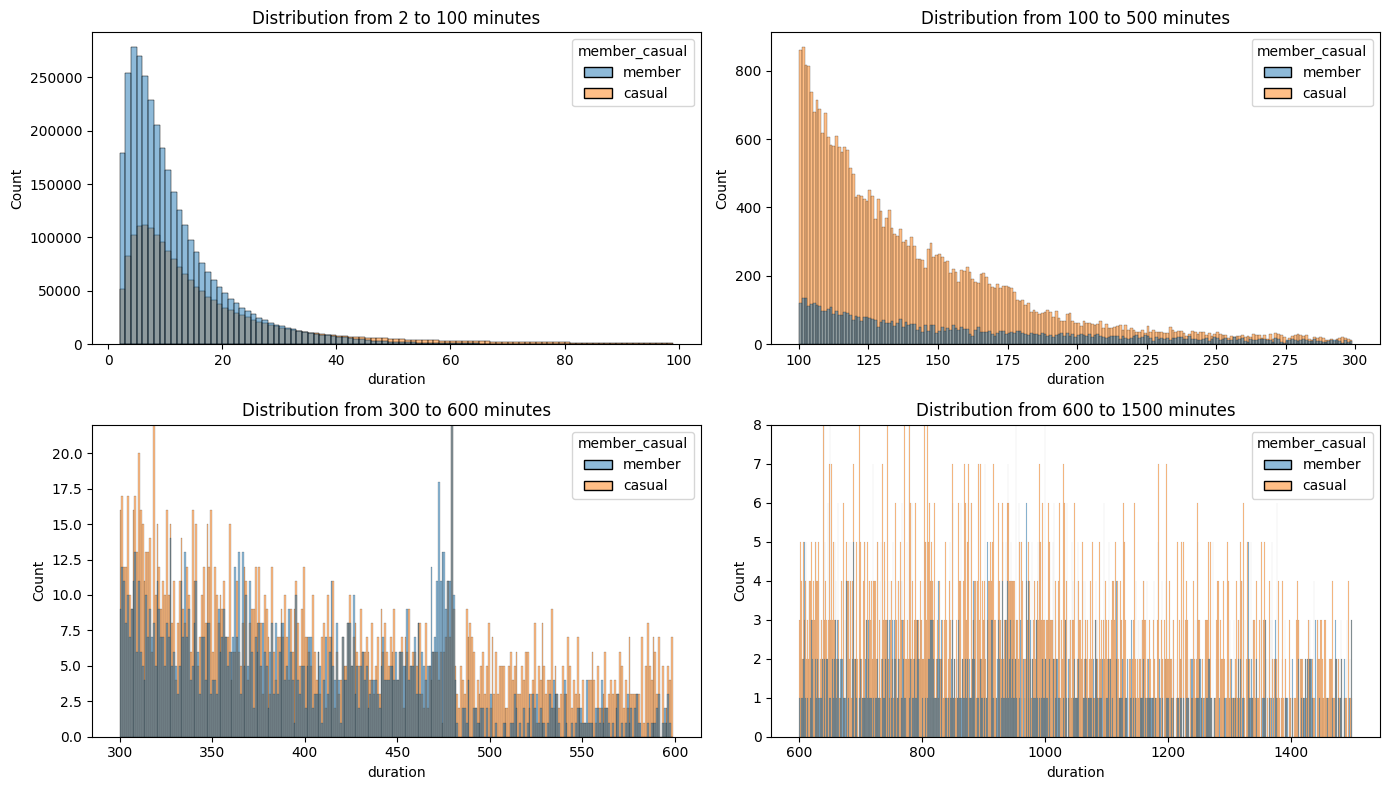

In [ ]:
# Create a figure and a 1x2 grid of subplots
import matplotlib.gridspec as gridspec
fig, axs = plt.subplots(2, 2, figsize=(14,8))
gs = gridspec.GridSpec(2, 2)

# Plot data on each subplot
ax1 = plt.subplot(gs[0, 0])
sns.histplot(df, x='duration', bins=range(2,100,1), hue="member_casual", ax=ax1)
ax1.set_title("Distribution from 2 to 100 minutes")

ax2 = plt.subplot(gs[0, 1])
sns.histplot(df, x='duration', bins=range(100,300), hue="member_casual", ax=ax2)
ax2.set_title("Distribution from 100 to 500 minutes")

ax3 = plt.subplot(gs[1, 0])
sns.histplot(df, x='duration', bins=range(300,600), hue="member_casual", ax=ax3)
ax3.set_ylim(0,22)
ax3.set_title("Distribution from 300 to 600 minutes")

ax4 = plt.subplot(gs[1, 1])
sns.histplot(df, x='duration', bins=range(600,1500), hue="member_casual", ax=ax4)
ax4.set_ylim(0,8)
ax4.set_title("Distribution from 600 to 1500 minutes")


# Display the figure with the subplots
plt.tight_layout()
plt.show()

### Number of rides by user by month

In [ ]:
df.groupby(["member_casual","month"]).agg({"duration" : ["mean","count"]}).sort_values(by=("duration","count"), ascending=False)

duration        
                              mean   count
member_casual month                       
member        August     13.748924  440313
              July       13.813138  415624
              June       13.434122  398923
              September  13.118434  388341
              May        13.200567  351230
              October    12.057292  344342
casual        July       23.648114  316773
              August     22.788900  298411
              June       22.621798  287935
member        April      12.156088  262026
              November   11.463357  252100
casual        September  21.995733  251615
              May        22.995589  223199
member        March      10.859095  183567
casual        October    19.786771  169967
member        December   11.335625  163872
              January    10.735421  140887
casual        April      21.377581  139895
              November   16.751950   94585
              March      15.908364   59108
              December   15.664421   49562
              January    14.234018   37986

### Number of rides by user by day of week

In [ ]:
df.groupby(["member_casual","day_of_week"]).agg({"duration" : ["mean","count"]}).sort_values(by=("duration","count"), ascending=False)

duration        
                                mean   count
member_casual day_of_week                   
member        Thursday     12.206523  542971
              Wednesday    12.131486  538279
              Tuesday      12.221242  521508
              Friday       12.660315  488511
              Monday       12.094103  447032
              Saturday     14.118832  433376
casual        Saturday     24.447700  386093
member        Sunday       14.163348  369548
casual        Sunday       25.128558  311276
              Friday       20.940602  294362
              Thursday     18.817588  255572
              Wednesday    18.520699  234175
              Tuesday      19.396247  229175
              Monday       21.298236  218383

### Answers to the question
* First, Members have more rides than casual ones (67% and 23%)
* Members prefer slightelly Classic bikes over Electric bikes However casual riders prefer Electric than classic bikes
* Only casual riders use docked bikes
* Casual riders tend to ride longer than members
* Members and casual riders have more rides and longer in summer (June, July, August) but less in winter (December, January)
* Members tend to ride more on weekdays (Monday through Friday) but casual riders on weekends (Saturday and Sunday)



In [ ]:
df.groupby(["member_casual","month","rideable_type"]).agg({"duration":["mean"]})

duration
                                            mean
member_casual month     rideable_type           
casual        April     classic_bike   27.048160
                        docked_bike    51.866884
                        electric_bike  15.068456
              August    classic_bike   25.860759
                        docked_bike    57.861626
                        electric_bike  15.723099
              December  classic_bike   23.218439
                        electric_bike  10.607544
              January   classic_bike   17.845075
                        docked_bike    38.816921
                        electric_bike  10.292804
              July      classic_bike   27.391948
                        docked_bike    56.489335
                        electric_bike  16.818334
              June      classic_bike   27.058288
                        docked_bike    57.162814
                        electric_bike  16.406214
              March     classic_bike   20.789535
                        docked_bike    42.428170
                        electric_bike  11.371123
              May       classic_bike   27.780881
                        docked_bike    54.510211
                        electric_bike  16.137912
              November  classic_bike   23.443105
                        electric_bike  11.554186
              October   classic_bike   26.724100
                        electric_bike  13.494472
              September classic_bike   28.285615
                        electric_bike  15.427288
member        April     classic_bike   13.308316
                        electric_bike  11.238104
              August    classic_bike   14.489270
                        electric_bike  12.862302
              December  classic_bike   12.323313
                        electric_bike  10.383102
              January   classic_bike   11.129012
                        electric_bike  10.310316
              July      classic_bike   14.694894
                        electric_bike  12.899281
              June      classic_bike   14.366338
                        electric_bike  12.587720
              March     classic_bike   11.618400
                        electric_bike  10.220485
              May       classic_bike   14.216308
                        electric_bike  12.239257
              November  classic_bike   12.318725
                        electric_bike  10.576207
              October   classic_bike   12.775944
                        electric_bike  11.281778
              September classic_bike   13.698058
                        electric_bike  12.450550

## Question 2 : Where are the best places to act ?

### Most frequented stations by casual riders


In [ ]:
df_casual = df[df["member_casual"]=="casual"]

In [ ]:
df_casual["end_station_name"].value_counts().reset_index()

,end_station_name,count
0,Streeter Dr & Grand Ave,54723
1,DuSable Lake Shore Dr & Monroe St,32324
2,Michigan Ave & Oak St,22889
3,DuSable Lake Shore Dr & North Blvd,22644
4,Millennium Park,21163
...,...,...
1561,Public Rack - Racine Ave & 76th,1
1562,Public Rack - Princeton Ave & 43rd St,1
1563,Public Rack - Northwest Hwy & Overhill Ave,1
1564,Public Rack - Normal Blvd & 61st Pl,1


In [ ]:
#Count how often a station is visited at the start and at the end then sum them
start_stations_count = df_casual["start_station_name"].value_counts().reset_index().rename(columns={"start_station_name":"station"})
end_stations_count = df_casual["end_station_name"].value_counts().reset_index().rename(columns={"end_station_name":"station"})
stations_count = pd.concat([start_stations_count,end_stations_count],ignore_index=True).groupby("station").sum()
stations_count.sort_values(by="count",ascending=False)[:10]

,count
station,
Streeter Dr & Grand Ave,105108
DuSable Lake Shore Dr & Monroe St,66466
Michigan Ave & Oak St,44588
DuSable Lake Shore Dr & North Blvd,42169
Millennium Park,40182
Theater on the Lake,39570
Wilton Ave & Belmont Ave,33954
Clark St & Lincoln Ave,32954
Montrose Harbor,32903


In [ ]:
stations_count.reset_index().to_csv("stations_count.csv")

### Most frequented lines

In [ ]:
df_casual.groupby(["start_station_name","end_station_name"]).count()["ride_id"].sort_values(ascending=False)[:10].to_frame()

ride_id
start_station_name                end_station_name                          
Streeter Dr & Grand Ave           Streeter Dr & Grand Ave               8862
DuSable Lake Shore Dr & Monroe St DuSable Lake Shore Dr & Monroe St     6931
                                  Streeter Dr & Grand Ave               5479
Michigan Ave & Oak St             Michigan Ave & Oak St                 3661
Streeter Dr & Grand Ave           DuSable Lake Shore Dr & Monroe St     3033
Montrose Harbor                   Montrose Harbor                       2951
Millennium Park                   Millennium Park                       2715
Dusable Harbor                    Dusable Harbor                        2307
                                  Streeter Dr & Grand Ave               2211
Shedd Aquarium                    Streeter Dr & Grand Ave               2136

### Answers
* Top 10 most frequented stations are :
** Streeter Dr & Grand Ave            
** DuSable Lake Shore Dr & Monroe St     
** Michigan Ave & Oak St                 
** DuSable Lake Shore Dr & North Blvd    
** Millennium Park                       
** Theater on the Lake                               
** Wilton Ave & Belmont Ave              
** Clark St & Lincoln Ave                
** Montrose Harbor  
** LaSalle St & Illinois St     
* And the most frequented lines (start_station - end_station) are just combination of these most frequented stations                   

# Create a Presentation
Now that we have gained some insights about the data and answer the business questions, let's export the data into power in order to create some visuals to share our findings with stakeholders through a presentation

In [ ]:
df.to_csv("cyclistic_clean.csv")